In [1]:
import pandas as pd
import re
import string
# from bs4 import BeautifulSoup
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
from nltk.probability import FreqDist
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install spacy
# !python -m spacy download en_core_web_sm
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [4]:
data_df = pd.read_csv("../rtgender/fitocracy_responses.csv")

In [5]:
data_df.head()

,op_id,op_gender,post_id,responder_id,response_text,responder_gender
0,102,W,0,1196122,One day at a time! =],M
1,104,W,1,5867,Crazy is synonymous with awesome in this case.,W
2,104,W,2,1635,You can enter assisted pullups. Select pullups...,M
3,117,M,3,8520,"Mirin 3% bodyfat? Yeah, you are.",W
4,117,M,4,29126,"Hey! I just started a new job, so things are s...",M


In [6]:
data_df1 = data_df.copy()

In [7]:
# Load spacy
nlp = spacy.load('en_core_web_sm')

def clean_string(text, stopwords = False, stem="None"):

    final_string = ""

    # Make lower
    text = text.lower()

#     # Remove line breaks
#     text = re.sub(r'\n', '', text)

#     # Remove puncuation
#     translator = str.maketrans('', '', string.punctuation)
#     text = text.translate(translator)

    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\S+www\S+', '', text)
    
    
    # Remove stop words
    text = text.split()
    text_filtered = text
    if stopwords == True:
        useless_words = nltk.corpus.stopwords.words("english")
#         useless_words = useless_words + ['hi', 'im']

        text_filtered = [word for word in text if not word in useless_words]

        # Remove numbers
        text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]
#     else:
#         text_filtered = text
    # Stem or Lemmatize
    if stem == 'Stem':
        stemmer = PorterStemmer() 
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    elif stem == 'Spacy':
        text_filtered = nlp(' '.join(text_filtered))
        text_stemmed = [y.lemma_ for y in text_filtered]
    else:
        text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string

In [8]:
data_df2 = data_df.copy()

In [9]:
data_df2['response_text'] = data_df2['response_text'].astype(str)

In [10]:
data_df2['response_text_cleaned'] = data_df2['response_text'].apply(lambda x: clean_string(x, stopwords = True, stem='Lem'))


In [11]:
data_df2['response_text_cleaned']

0                                          one day time! =]
1                            crazy synonymous awesome case.
2         enter assisted pullups. select pullups normall...
3                               mirin % bodyfat? yeah, are.
4         hey! started new job, thing sorta hectic. let ...
                                ...                        
318530                               let's go!!!get done!!!
318531    stackhouse!! two options: want want most. choose.
318532                             welcome. keep hard work!
318533     calendar us dollar store missing monday tuesday.
318534                                      wait minute....
Name: response_text_cleaned, Length: 318535, dtype: object

In [12]:
data_df2['response_text_cleaned1'] = data_df2['response_text_cleaned'].str.split()

In [13]:
data_df2['response_text_cleaned1']

0                                     [one, day, time!, =]]
1                       [crazy, synonymous, awesome, case.]
2         [enter, assisted, pullups., select, pullups, n...
3                         [mirin, %, bodyfat?, yeah,, are.]
4         [hey!, started, new, job,, thing, sorta, hecti...
                                ...                        
318530                           [let's, go!!!get, done!!!]
318531    [stackhouse!!, two, options:, want, want, most...
318532                        [welcome., keep, hard, work!]
318533    [calendar, us, dollar, store, missing, monday,...
318534                                   [wait, minute....]
Name: response_text_cleaned1, Length: 318535, dtype: object

In [14]:
data_df2['response_text_cleaned']

0                                          one day time! =]
1                            crazy synonymous awesome case.
2         enter assisted pullups. select pullups normall...
3                               mirin % bodyfat? yeah, are.
4         hey! started new job, thing sorta hectic. let ...
                                ...                        
318530                               let's go!!!get done!!!
318531    stackhouse!! two options: want want most. choose.
318532                             welcome. keep hard work!
318533     calendar us dollar store missing monday tuesday.
318534                                      wait minute....
Name: response_text_cleaned, Length: 318535, dtype: object

In [15]:
data_df2.to_csv("./preprocessed_data/fitness_response_preprocssed_Lem_stopwords_removal1.csv")

In [16]:
all_words1 = ''
# for i, row in data_df1.iterrows():
#     all_words = all_words + row['response_text_cleaned']
# data_df2['common'] = 1
# all_words = data_df2.groupby(['op_gender'])['response_text_cleaned'].transform(lambda x : ' '.join(x)).reset_index()
all_words = data_df2.groupby(['op_gender', 'responder_gender']).agg({'response_text_cleaned': ' '.join}).reset_index()
# all_words = data_df1['response_text_cleaned1'].astype(str).apply(''.join)
print(all_words)
# data_df1['response_text_cleaned'].apply(lambda x: clean_string(x, stopwords = False, stem='Stem'))


  op_gender responder_gender  \
0         M                M   
1         M                W   
2         W                M   
3         W                W   

                               response_text_cleaned  
0  hey! started new job, thing sorta hectic. let ...  
1  mirin % bodyfat? yeah, are. bad. .o doubt: who...  
2  one day time! =] enter assisted pullups. selec...  
3  crazy synonymous awesome case. wait wwwaaatt! ...  


In [17]:
all_words[all_words['op_gender']=='M']['response_text_cleaned']

0    hey! started new job, thing sorta hectic. let ...
1    mirin % bodyfat? yeah, are. bad. .o doubt: who...
Name: response_text_cleaned, dtype: object

In [18]:
#the NLTK FreqDist gives a count for how often each part of the text occurs
fd_wct1_op_M_res_M = FreqDist(all_words[((all_words['op_gender']=='M') & (all_words['responder_gender']=='M'))]['response_text_cleaned'].values[0].split())
# fd_wct1_M

In [19]:
#the NLTK FreqDist gives a count for how often each part of the text occurs
fd_wct1_op_M_res_F = FreqDist(all_words[((all_words['op_gender']=='M') & (all_words['responder_gender']=='W'))]['response_text_cleaned'].values[0].split())
# fd_wct1_M

In [20]:
#the NLTK FreqDist gives a count for how often each part of the text occurs
fd_wct1_op_F_res_M = FreqDist(all_words[((all_words['op_gender']=='W') & (all_words['responder_gender']=='M'))]['response_text_cleaned'].values[0].split())
# fd_wct1_M

In [21]:
#the NLTK FreqDist gives a count for how often each part of the text occurs
fd_wct1_op_F_res_F = FreqDist(all_words[((all_words['op_gender']=='W') & (all_words['responder_gender']=='W'))]['response_text_cleaned'].values[0].split())
# fd_wct1_M

In [22]:
## http://mindseye.sharonhoward.org/posts/my-new-favourite-thing-weighted-log-odds-ratios/
## https://bookdown.org/Maxine/tidy-text-mining/weighted-log-odds-ratio.html

In [23]:
print(fd_wct1_op_M_res_M.most_common(40))


[('thanks', 8786), ("i'm", 5898), ('like', 5465), ('get', 5115), (':)', 5042), ('good', 4719), ('back', 3870), ('thank', 3372), ("i've", 3329), ('see', 3279), ('keep', 3103), ('-', 2842), ('following', 2647), ('follow', 2473), ('thanks!', 2435), ('work', 2352), ('one', 2317), ('better', 2305), ('time', 2276), ('start', 2244), ('welcome', 2171), ('people', 2168), ('got', 2163), ('best', 2149), ('go', 2071), ('fitocracy', 2008), ('going', 1958), ('workout', 1934), ('probably', 1921), ('day', 1905), ('know', 1827), ('think', 1762), ('great', 1755), ('really', 1701), ('man!', 1666), ('it.', 1661), ("i'll", 1633), ('much', 1623), (':d', 1607), ('need', 1570)]


In [24]:
print(fd_wct1_op_M_res_F.most_common(40))


[('fitocracy', 38920), ('help', 38785), ('-', 35765), ('great', 23148), ('keep', 23042), (';)', 23024), ('welcome!', 22815), ('workout', 22699), ('need', 22531), ('question', 22096), ('place', 21900), ('track', 21526), ('finding', 21326), ('supportive', 21274), ('training,', 21259), ('consistent,', 21238), ('community.', 21136), ('welcome', 19145), (':)', 17830), ('way', 17783), ('getting', 17710), ('know', 17703), ('started', 17491), ('find', 17450), ('profile', 17332), ('exercise', 17273), ('ask', 17225), ('web', 17139), ('iphone', 17134), ('glad', 17041), ('message', 17037), ('name,', 16943), ('around:', 16816), ('guides:', 16814), ('group:', 16612), ('etc--leave', 16605), ('ya', 16575), ('.', 13613), ('tap', 12941), ('thanks', 9165)]


In [25]:
print(fd_wct1_op_F_res_F.most_common(40))


[('help', 38092), ('fitocracy', 37599), ('-', 33774), ('question', 23781), ('need', 23273), ('keep', 22948), ('great', 22916), ('workout', 22646), ('place', 22197), ('welcome!', 22128), (';)', 21891), ('track', 21835), ('finding', 21609), ('supportive', 21559), ('training,', 21559), ('consistent,', 21531), ('community.', 21205), ('.', 19832), ('tap', 19370), ('welcome', 17090), ('started', 16585), ('iphone', 16188), ('web', 16178), ('know', 16039), ('way', 15862), ('find', 15688), ('exercise', 15624), ('ask', 15590), ('getting', 15495), ('profile', 15359), ('message', 15143), ('name,', 15088), ('glad', 15038), ('ya', 15015), ('guides:', 14746), ('around:', 14745), ('group:', 14512), ('etc--leave', 14507), (':)', 10297), ('start', 7492)]


In [26]:
print(fd_wct1_op_F_res_M.most_common(40))


[(':)', 10281), ('thanks', 8805), ('thank', 6156), ('like', 5142), ('good', 4971), ("i'm", 4407), ('get', 4077), ('back', 3859), ('following', 3697), ('follow', 3661), ('keep', 3382), ('see', 3224), ('welcome', 3033), ('thanks!', 2868), ("i've", 2849), ('great', 2521), ('better', 2490), (':d', 2364), ('best', 2362), ('-', 2349), ('back!', 2329), ('people', 2324), ('you!', 2274), (';)', 2167), ('start', 2151), ('work', 2009), ('welcome!', 1961), ('one', 1931), ('fitocracy', 1924), ('probably', 1833), ('go', 1816), (':-)', 1777), ('hope', 1774), ('time', 1746), ('well', 1725), ('workout', 1714), ('place', 1655), ('question', 1629), ('much', 1621), ('post', 1595)]


In [27]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_df2['response_text_cleaned'])
features = vectorizer.get_feature_names_out()
y = data_df2['op_gender']

In [28]:
print(features[:30])

['__' '___' '____' '_____' '______' '_______' '________' '__________'
 '______________' '__________________' '________________________' '__it'
 '_and_' '_c' '_corona' '_definitely_' '_do_' '_everyday' '_have_' '_hot_'
 '_i_' '_insane_' '_is_' '_know_' '_maz_' '_me_' '_not_' '_out_'
 '_paula_p_' '_something_']


In [29]:
X.shape, len(y), len(features)

((318535, 53501), 318535, 53501)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.predict(X[:2, :]))
print(clf.predict_proba(X[:2, :]))
# >>> clf.score(X, y)

['M' 'M']
[[0.56997423 0.43002577]
 [0.5093679  0.4906321 ]]


In [32]:
y[:2]

0    W
1    W
Name: op_gender, dtype: object

In [33]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid = dict(penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=5,  shuffle = True, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.586984 using {'C': 0.1, 'penalty': 'l2'}
0.579979 (0.001838) with: {'C': 100, 'penalty': 'l2'}
0.581090 (0.001319) with: {'C': 10, 'penalty': 'l2'}
0.582842 (0.001449) with: {'C': 1.0, 'penalty': 'l2'}
0.586984 (0.001034) with: {'C': 0.1, 'penalty': 'l2'}
0.583765 (0.002708) with: {'C': 0.01, 'penalty': 'l2'}


In [34]:
test_pred = grid_result.predict(X_test)
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, test_pred)
print("test accuracy : ", test_acc)

test accuracy :  0.5898570164673649


In [35]:
all_pred = grid_result.predict(X)
from sklearn.metrics import accuracy_score
all_acc = accuracy_score(y, all_pred)
print("overall accuracy : ", all_acc)

overall accuracy :  0.6080148178379142


In [36]:
grid_result.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [37]:
# get importance
importance = grid_result.best_estimator_.coef_[0]
feature_importance = pd.DataFrame({"importance":importance, "features":features})
feature_importance

,importance,features
0,0.253588,__
1,-0.144298,___
2,-0.075635,____
3,-0.040028,_____
4,0.004971,______
...,...,...
53496,-0.027581,zzz
53497,0.000000,zzzzz
53498,-0.030127,zzzzzz
53499,0.047834,zzzzzzzz


In [38]:
feature_importance.sort_values(['importance'],  key=abs, inplace=True)
feature_importance


,importance,features
26750,0.000000,leonie
20274,0.000000,haka
20275,0.000000,hakkif
20277,0.000000,hakubatrail
20278,0.000000,hakuna
...,...,...
13450,-1.872825,dude
6006,-1.897597,bro
28871,-2.254325,mate
28442,-2.486243,man


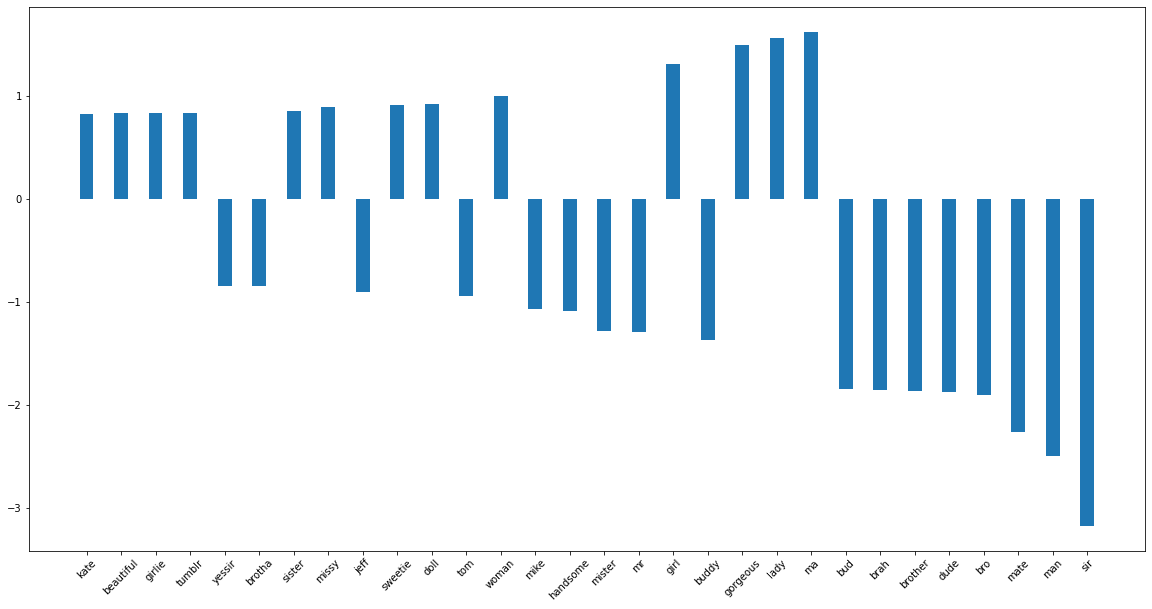

In [39]:
# plot feature importance
plt.figure(figsize=(20, 10))
plt.bar(feature_importance['features'][-30:], feature_importance['importance'][-30:], width = 0.4)
plt.xticks(rotation=45)
plt.show()

In [40]:
# visualize most freuquent words

In [41]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_df2['response_text_cleaned'])
features = vectorizer.get_feature_names_out()
y = data_df2['op_gender']

In [42]:
print(features[:30])

['__' '___' '____' '_____' '______' '_______' '________' '__________'
 '______________' '__________________' '________________________' '__it'
 '_and_' '_c' '_corona' '_definitely_' '_do_' '_everyday' '_have_' '_hot_'
 '_i_' '_insane_' '_is_' '_know_' '_maz_' '_me_' '_not_' '_out_'
 '_paula_p_' '_something_']


In [43]:
X.shape, len(y), len(features)

((318535, 53501), 318535, 53501)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.predict(X[:2, :]))
print(clf.predict_proba(X[:2, :]))
# >>> clf.score(X, y)

['M' 'W']
[[0.60622325 0.39377675]
 [0.45785162 0.54214838]]


In [46]:
y[:2]

0    W
1    W
Name: op_gender, dtype: object

In [47]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid = dict(penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=5,  shuffle = True, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.588530 using {'C': 1.0, 'penalty': 'l2'}
0.581160 (0.002255) with: {'C': 100, 'penalty': 'l2'}
0.582036 (0.001315) with: {'C': 10, 'penalty': 'l2'}
0.588530 (0.000711) with: {'C': 1.0, 'penalty': 'l2'}
0.588427 (0.000678) with: {'C': 0.1, 'penalty': 'l2'}
0.572492 (0.001168) with: {'C': 0.01, 'penalty': 'l2'}


In [48]:
test_pred = grid_result.predict(X_test)
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, test_pred)
print("test accuracy : ", test_acc)

test accuracy :  0.5923685036673421


In [49]:
all_pred = grid_result.predict(X)
from sklearn.metrics import accuracy_score
all_acc = accuracy_score(y, all_pred)
print("overall accuracy : ", all_acc)

overall accuracy :  0.6254917042083288


In [50]:
grid_result.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [51]:
# get importance
importance = grid_result.best_estimator_.coef_[0]
feature_importance = pd.DataFrame({"importance":importance, "features":features})
feature_importance

,importance,features
0,0.693150,__
1,-0.627487,___
2,-0.567188,____
3,-0.363360,_____
4,0.277432,______
...,...,...
53496,-0.201713,zzz
53497,0.000000,zzzzz
53498,-0.166357,zzzzzz
53499,0.147873,zzzzzzzz


In [52]:
feature_importance.sort_values(['importance'],  key=abs, inplace=True)
feature_importance


,importance,features
26750,0.000000,leonie
21680,0.000000,hollerrrr
21683,0.000000,hollidays
21684,0.000000,holllaaa
21685,0.000000,hollllllaaaa
...,...,...
6006,-4.630404,bro
28871,-4.795596,mate
13450,-4.810933,dude
42271,-6.767743,sir


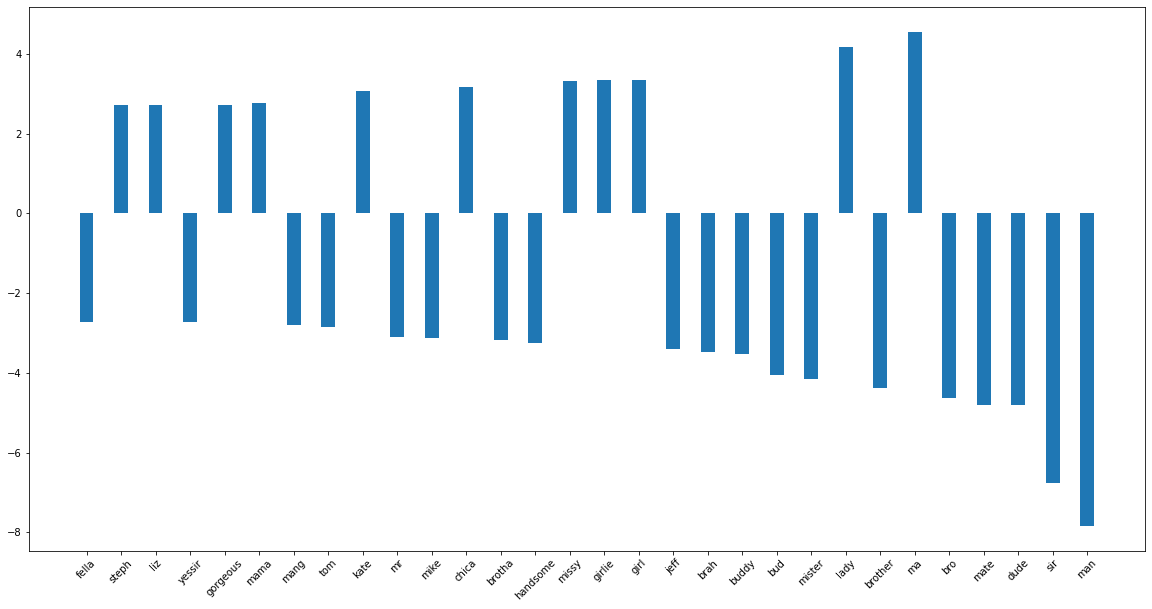

In [53]:
# plot feature importance
plt.figure(figsize=(20, 10))
plt.bar(feature_importance['features'][-30:], feature_importance['importance'][-30:], width = 0.4)
plt.xticks(rotation=45)
plt.show()

In [54]:
# visualize most freuquent words

In [55]:
all_words

,op_gender,responder_gender,response_text_cleaned
0,M,M,"hey! started new job, thing sorta hectic. let ..."
1,M,W,"mirin % bodyfat? yeah, are. bad. .o doubt: who..."
2,W,M,one day time! =] enter assisted pullups. selec...
3,W,W,crazy synonymous awesome case. wait wwwaaatt! ...


In [56]:
df_op_M_res_M = pd.DataFrame(fd_wct1_op_M_res_M.items(), columns=['word', 'n'])
cnt = 0 
total_words_M_M = sum(fd_wct1_op_M_res_M.values())

df_op_M_res_M['total_words'] = total_words_M_M
df_op_M_res_M['gender'] ='op_M_res_M'
df_op_M_res_M


,word,n,total_words,gender
0,hey!,96,607497,op_M_res_M
1,started,1007,607497,op_M_res_M
2,new,1023,607497,op_M_res_M
3,"job,",35,607497,op_M_res_M
4,thing,1420,607497,op_M_res_M
...,...,...,...,...
63134,feed...in,1,607497,op_M_res_M
63135,feed...lol,1,607497,op_M_res_M
63136,beastliness,1,607497,op_M_res_M
63137,"militaries,",1,607497,op_M_res_M


In [57]:
df_op_M_res_F = pd.DataFrame(fd_wct1_op_M_res_F.items(), columns=['word', 'n'])
cnt = 0 
total_words_M_F = sum(fd_wct1_op_M_res_F.values())

df_op_M_res_F['total_words'] = total_words_M_F
df_op_M_res_F['gender'] ='op_M_res_F'
df_op_M_res_F

,word,n,total_words,gender
0,mirin,32,1341162,op_M_res_F
1,%,92,1341162,op_M_res_F
2,bodyfat?,2,1341162,op_M_res_F
3,"yeah,",368,1341162,op_M_res_F
4,are.,33,1341162,op_M_res_F
...,...,...,...,...
54957,reference!,1,1341162,op_M_res_F
54958,goddess...,1,1341162,op_M_res_F
54959,stackhouse!!,1,1341162,op_M_res_F
54960,options:,1,1341162,op_M_res_F


In [58]:
df_op_F_res_F = pd.DataFrame(fd_wct1_op_F_res_F.items(), columns=['word', 'n'])
cnt = 0 
total_words_F_F = sum(fd_wct1_op_F_res_F.values())

df_op_F_res_F['total_words'] = total_words_F_F
df_op_F_res_F['gender'] ='op_F_res_F'
df_op_F_res_F

,word,n,total_words,gender
0,crazy,145,1258041,op_F_res_F
1,synonymous,1,1258041,op_F_res_F
2,awesome,748,1258041,op_F_res_F
3,case.,3,1258041,op_F_res_F
4,wait,251,1258041,op_F_res_F
...,...,...,...,...
43431,@robinls!,1,1258041,op_F_res_F
43432,age...,1,1258041,op_F_res_F
43433,"bang,",1,1258041,op_F_res_F
43434,xxxxxxxxxx,1,1258041,op_F_res_F


In [59]:
df_op_F_res_M = pd.DataFrame(fd_wct1_op_F_res_M.items(), columns=['word', 'n'])
cnt = 0 
total_words_F_M = sum(fd_wct1_op_F_res_M.values())

df_op_F_res_M['total_words'] = total_words_F_M
df_op_F_res_M['gender'] ='op_F_res_M'
df_op_F_res_M

,word,n,total_words,gender
0,one,1931,544419,op_F_res_M
1,day,1479,544419,op_F_res_M
2,time!,253,544419,op_F_res_M
3,=],171,544419,op_F_res_M
4,enter,86,544419,op_F_res_M
...,...,...,...,...
55097,think.--brian,1,544419,op_F_res_M
55098,swinging.,1,544419,op_F_res_M
55099,/sarcasticdouchemodeoff,1,544419,op_F_res_M
55100,kev!,1,544419,op_F_res_M


In [60]:
df_all_for_R = pd.concat([df_op_M_res_M, df_op_M_res_F, df_op_F_res_M, df_op_F_res_F])
df_all_for_R

,word,n,total_words,gender
0,hey!,96,607497,op_M_res_M
1,started,1007,607497,op_M_res_M
2,new,1023,607497,op_M_res_M
3,"job,",35,607497,op_M_res_M
4,thing,1420,607497,op_M_res_M
...,...,...,...,...
43431,@robinls!,1,1258041,op_F_res_F
43432,age...,1,1258041,op_F_res_F
43433,"bang,",1,1258041,op_F_res_F
43434,xxxxxxxxxx,1,1258041,op_F_res_F


In [61]:
df_all_for_R.to_csv("./preprocessed_data/fitness_responses_preprocressed_for_R_Lemma1.csv")

In [62]:
df_all_for_R.gender.unique()

array(['op_M_res_M', 'op_M_res_F', 'op_F_res_M', 'op_F_res_F'],
      dtype=object)

In [ ]:
# after runing R code

In [63]:
weighted_log_odds_df = pd.read_csv("./preprocessed_data/fitness_responses_weighted_log_odds_Lemma1.csv")
weighted_log_odds_df.sort_values(['log_odds_weighted'], inplace=True)

In [64]:
weighted_log_odds_df = weighted_log_odds_df.dropna()
weighted_log_odds_df

,Unnamed: 0,X,word,n,total_words,gender,log_odds_weighted
300,301,300,help,789,607497,op_M_res_M,-34.806676
1141,1142,1141,fitocracy,2008,607497,op_M_res_M,-31.562553
118979,118980,878,help,826,544419,op_F_res_M,-28.713744
256,257,256,-,2842,607497,op_M_res_M,-27.261184
25085,25086,25085,"consistent,",6,607497,op_M_res_M,-27.235585
...,...,...,...,...,...,...,...
198725,198726,25522,"""start",6034,1258041,op_F_res_F,70.384965
198726,198727,25523,etc--drop,6454,1258041,op_F_res_F,72.738021
198723,198724,25520,exercise...even,6454,1258041,op_F_res_F,72.738021
200011,200012,26808,etc--leave,14507,1258041,op_F_res_F,105.358938


In [65]:
weighted_log_odds_df.gender.unique()

array(['op_M_res_M', 'op_F_res_M', 'op_F_res_F', 'op_M_res_F'],
      dtype=object)

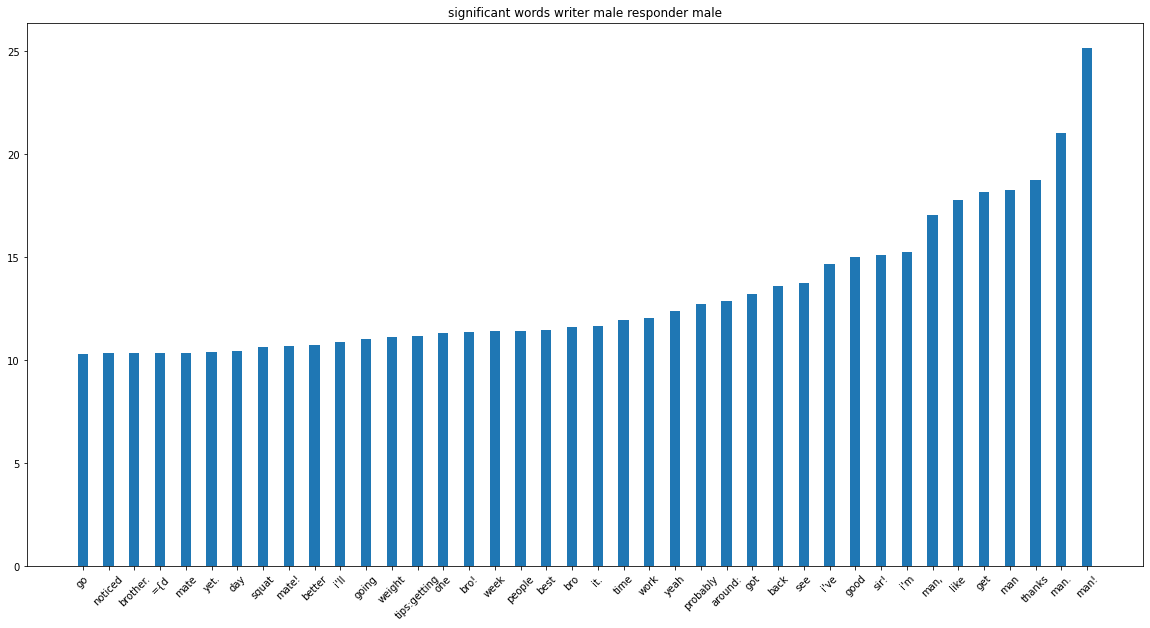

In [66]:
filtered_df = weighted_log_odds_df[weighted_log_odds_df['gender']=='op_M_res_M']
plt.figure(figsize=(20, 10))
plt.bar(filtered_df['word'][-40:], filtered_df['log_odds_weighted'][-40:], width=0.4)
plt.title("significant words writer male responder male")
plt.xticks(rotation=45)
plt.show()

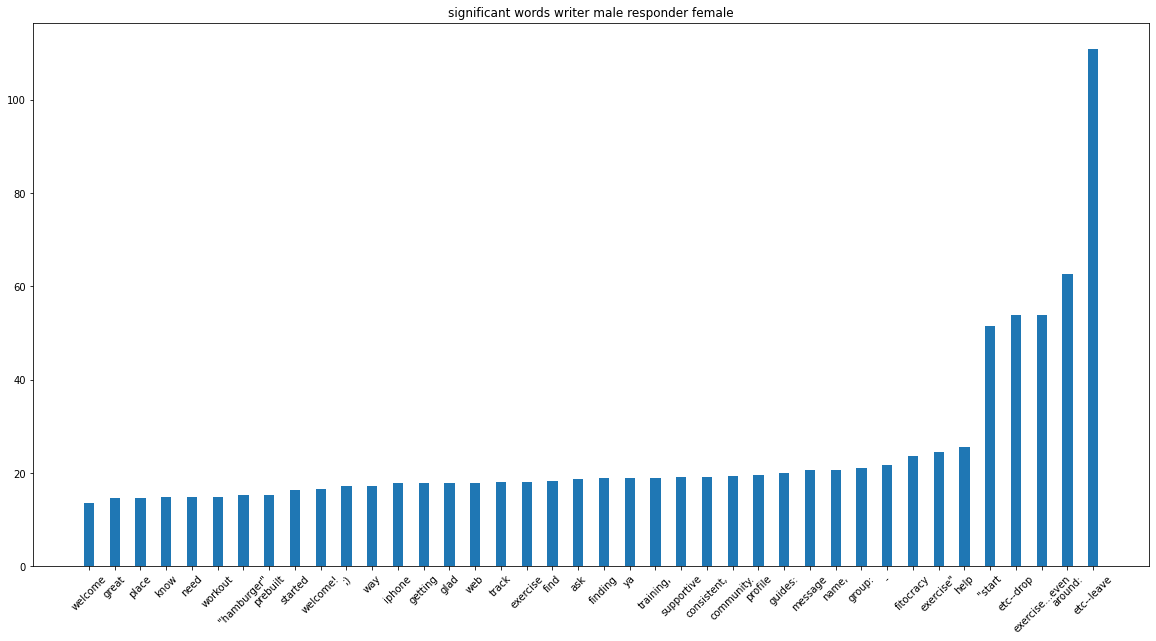

In [67]:
filtered_df = weighted_log_odds_df[weighted_log_odds_df['gender']=='op_M_res_F']
plt.figure(figsize=(20, 10))
plt.bar(filtered_df['word'][-40:], filtered_df['log_odds_weighted'][-40:], width=0.4)
plt.title("significant words writer male responder female")
plt.xticks(rotation=45)
plt.show()

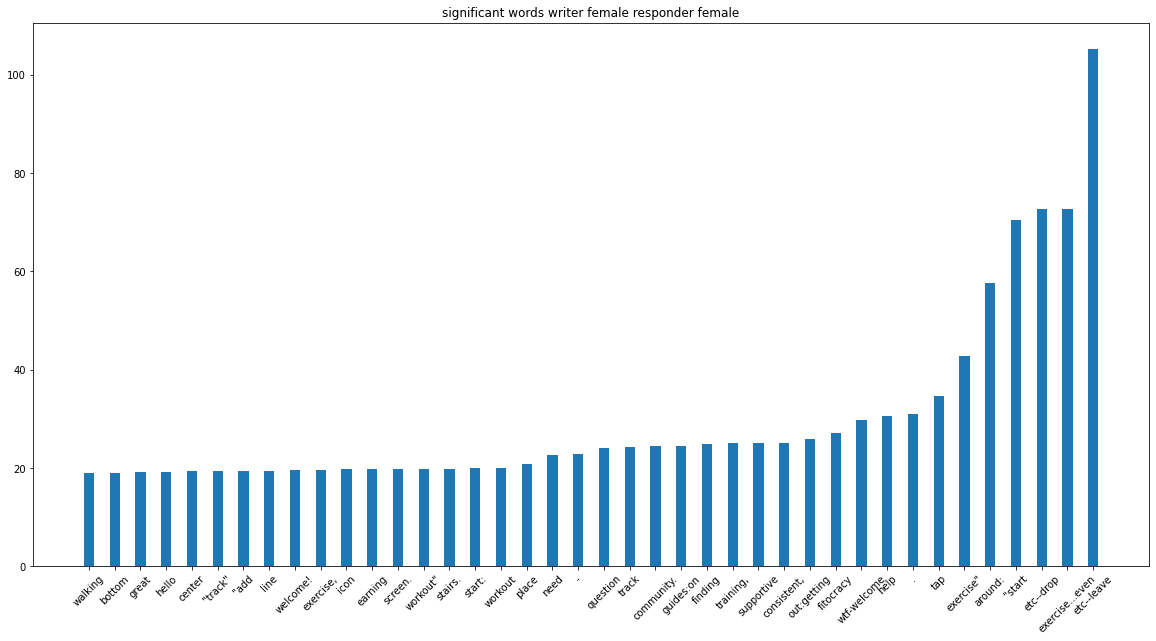

In [68]:
filtered_df = weighted_log_odds_df[weighted_log_odds_df['gender']=='op_F_res_F']
plt.figure(figsize=(20, 10))
plt.bar(filtered_df['word'][-40:], filtered_df['log_odds_weighted'][-40:], width=0.4)
plt.title("significant words writer female responder female")
plt.xticks(rotation=45)
plt.show()

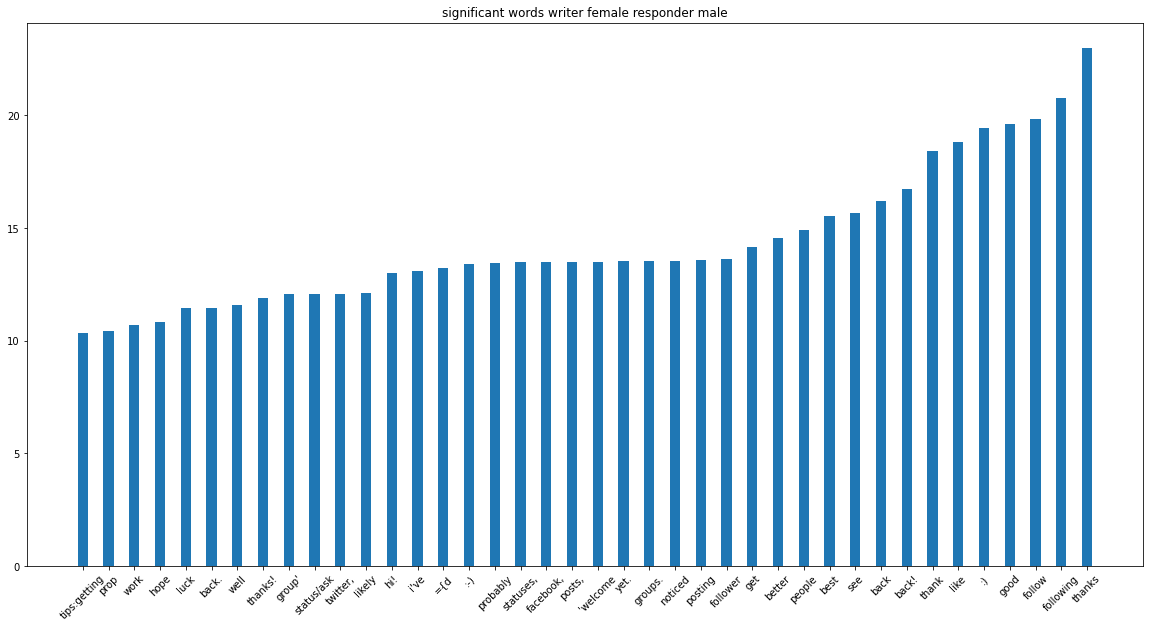

In [69]:
filtered_df = weighted_log_odds_df[weighted_log_odds_df['gender']=='op_F_res_M']
plt.figure(figsize=(20, 10))
plt.bar(filtered_df['word'][-40:], filtered_df['log_odds_weighted'][-40:], width=0.4)
plt.title("significant words writer female responder male")
plt.xticks(rotation=45)
plt.show()